In [1]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
X = []
Y = []


for i in range(1,3993):
    img = Image.open('All/'+str(i)+'.jpg')
    data = np.asarray( img, dtype="int32" ) / 255
    
    X.append(data)

    if i < 500:
        Y.append(0) #person

    elif i >= 500 and i < 999:
        Y.append(1) #dog

    elif i >= 999 and i < 1498:
        Y.append(2) #airplane

    elif i >= 1498 and i < 1997:
        Y.append(3) #cat

    elif i >= 1997 and i < 2496:
        Y.append(4) #flower

    elif i >= 2496 and i < 2995:
        Y.append(5) #car

    elif i >= 2995 and i < 3494:
        Y.append(6) #fruit

    elif i >= 3494:
        Y.append(7) #motorbike

In [3]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train_original = np.asarray(X_train_original)
X_test_original = np.asarray(X_test_original)

# label_encoder = LabelEncoder()
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [5]:
# this is our input placeholder
input_img = Input(shape=(128,128,3,))
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(3, (3, 3), activation='relu', padding='same')(pool2)

#decoder
conv4 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv3)
up1 = UpSampling2D((2, 2))(conv4)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv5)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='final')(up2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, conv3)

autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 3)         219       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
__________

In [7]:
h = autoencoder.fit(X_train_original, X_train_original,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test_original, X_test_original))

Instructions for updating:
Use tf.cast instead.
Train on 3193 samples, validate on 799 samples
Epoch 1/20
3193/3193 [==============================] - 99s 31ms/step - loss: 1.5194 - val_loss: 1.4773
Epoch 2/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.5061 - val_loss: 1.4709
Epoch 3/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.5022 - val_loss: 1.4691
Epoch 4/20
3193/3193 [==============================] - 96s 30ms/step - loss: 1.5008 - val_loss: 1.4681
Epoch 5/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.5000 - val_loss: 1.4674
Epoch 6/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.4994 - val_loss: 1.4669
Epoch 7/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.4989 - val_loss: 1.4664
Epoch 8/20
3193/3193 [==============================] - 95s 30ms/step - loss: 1.4985 - val_loss: 1.4662
Epoch 9/20
3193/3193 [==============================] - 95s 30ms/step - l

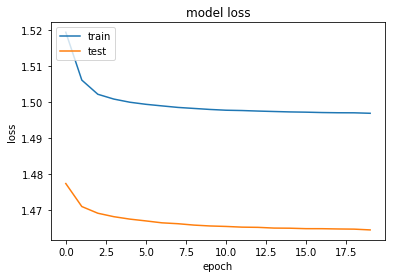

In [8]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
autoencoder.save('autoencoder.h5')
encoder.save('encoder.h5')

In [10]:
X_train_encoded = encoder.predict(X_train_original)
X_train_autoencoded = autoencoder.predict(X_train_original)

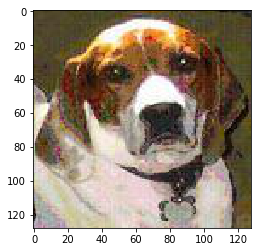

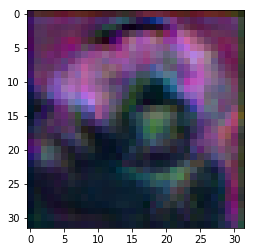

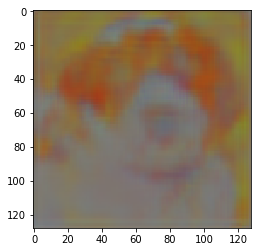

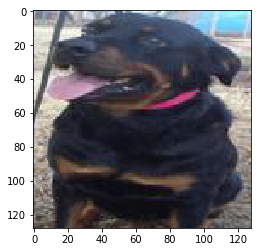

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


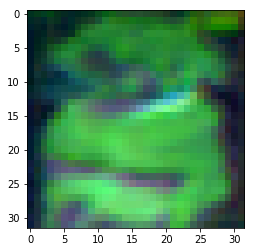

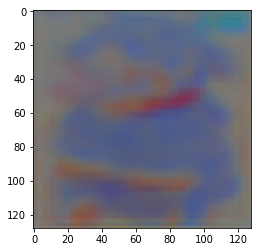

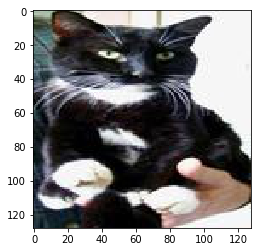

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


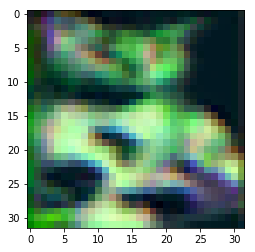

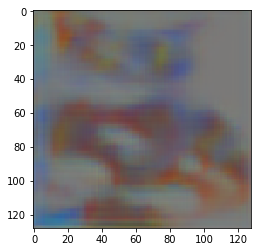

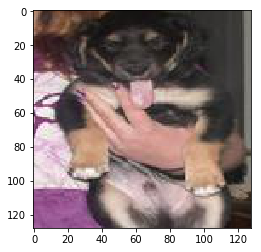

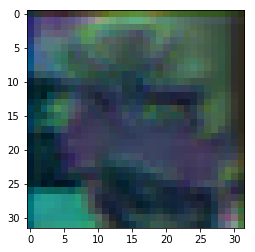

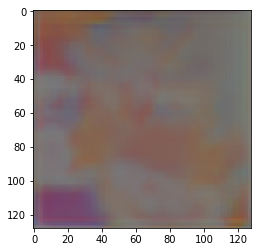

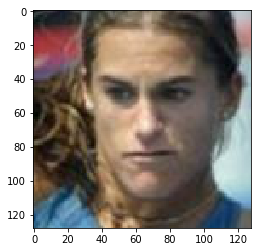

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


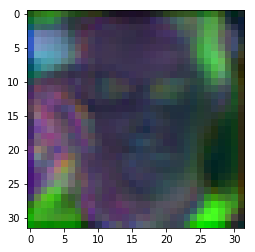

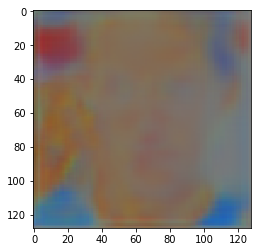

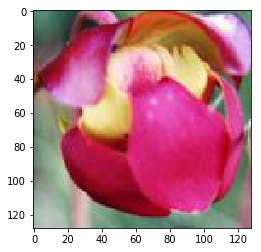

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


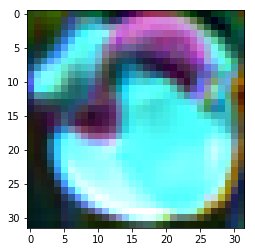

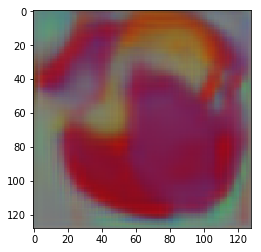

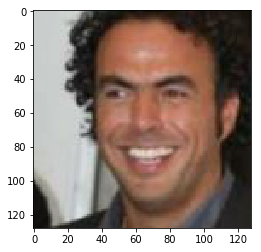

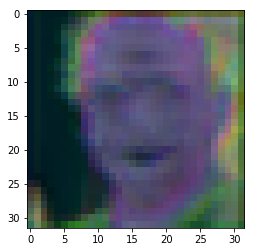

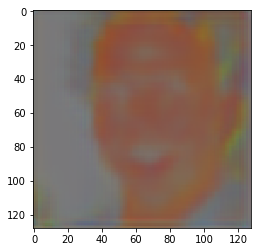

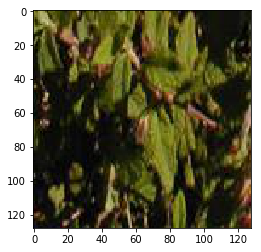

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


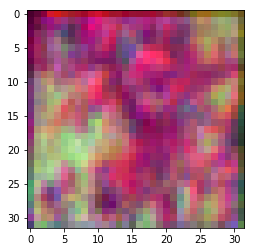

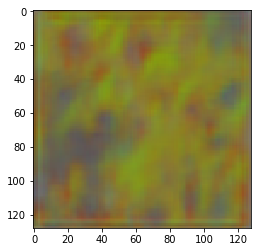

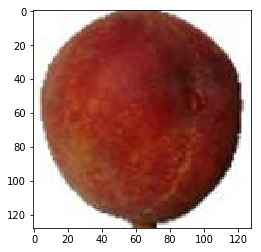

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


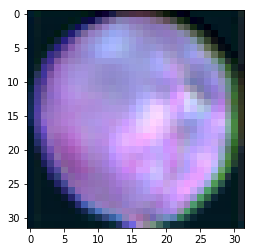

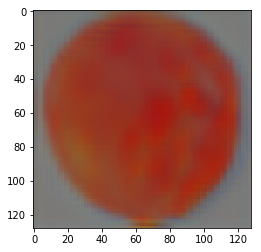

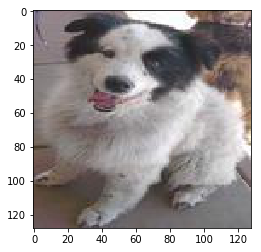

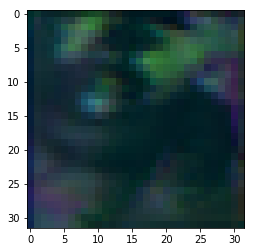

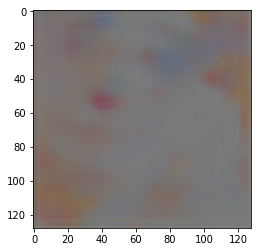

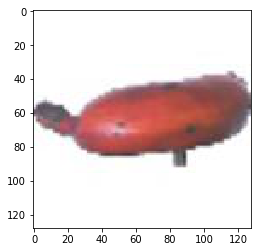

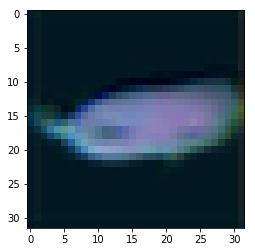

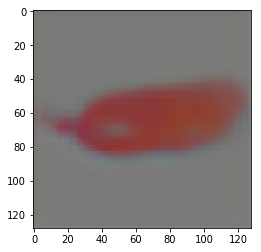

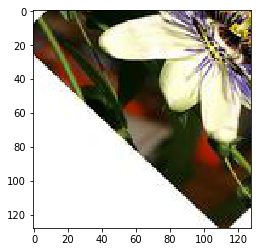

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


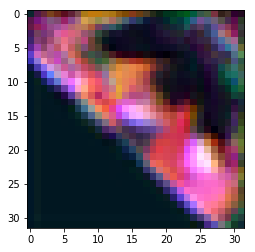

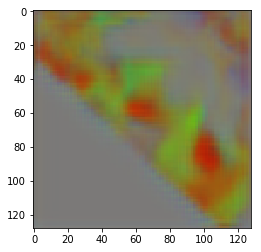

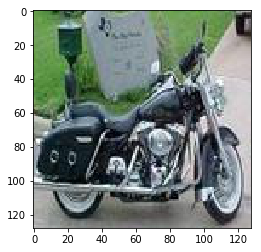

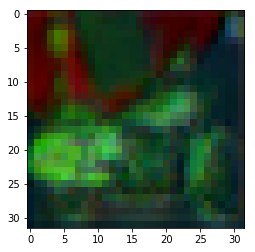

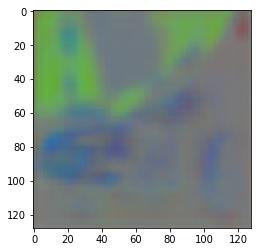

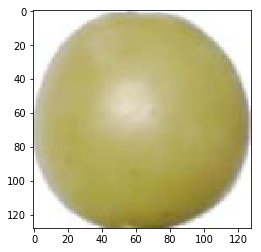

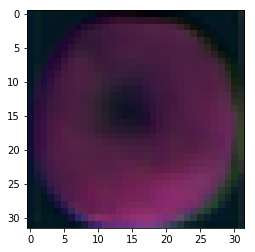

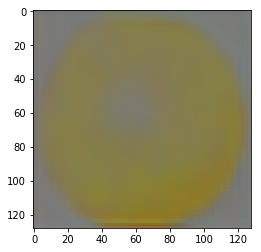

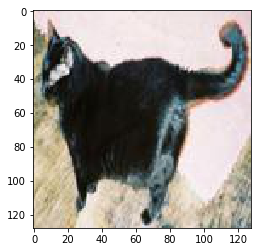

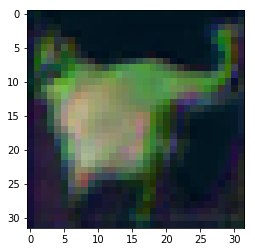

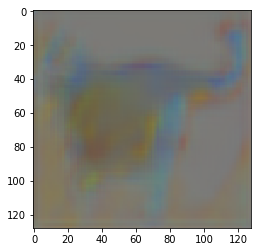

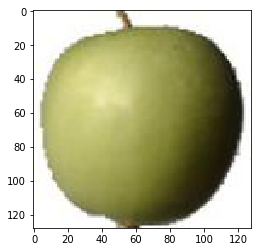

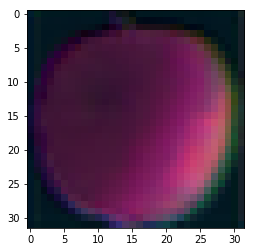

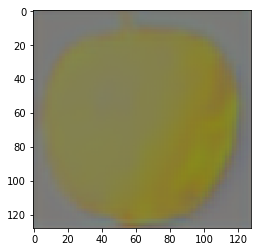

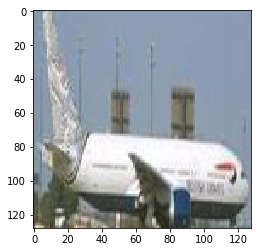

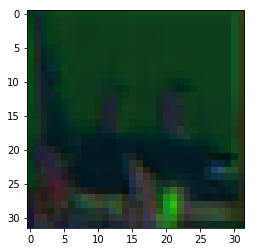

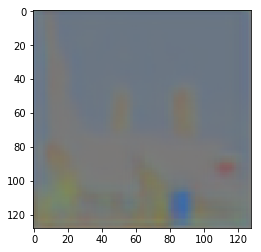

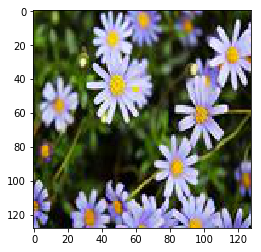

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


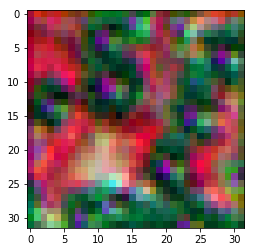

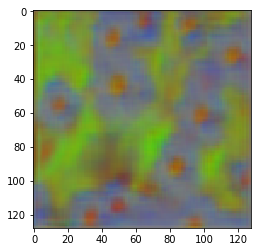

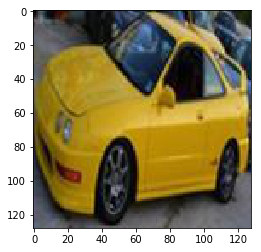

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


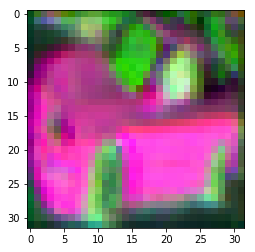

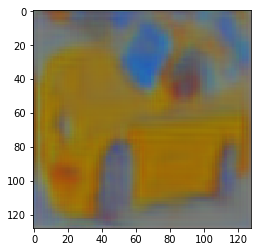

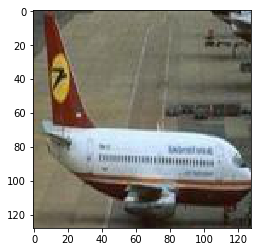

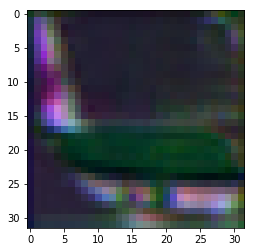

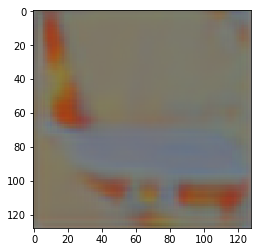

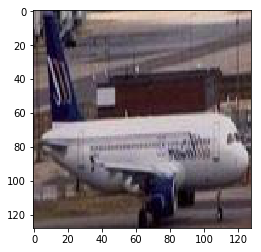

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


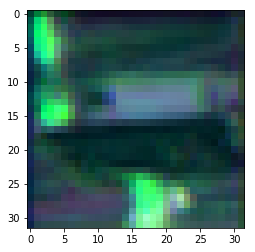

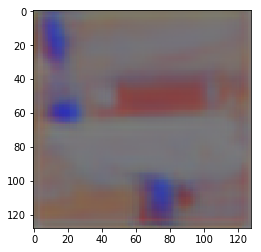

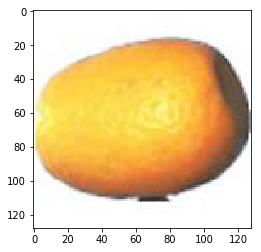

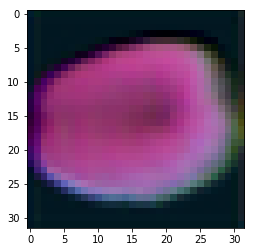

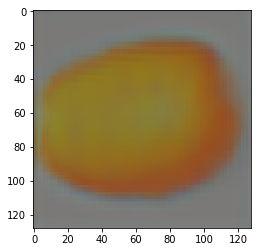

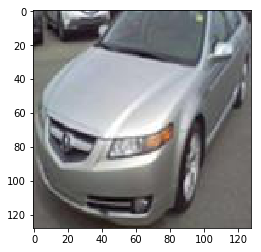

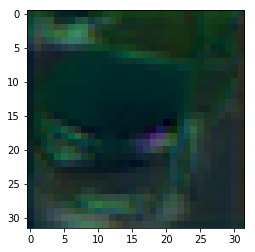

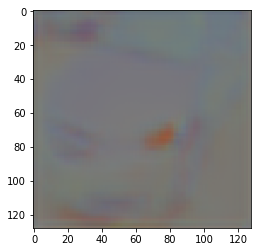

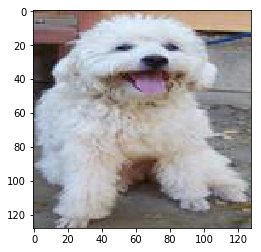

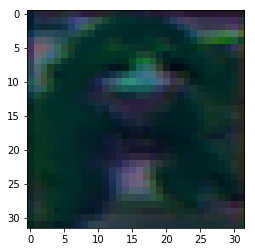

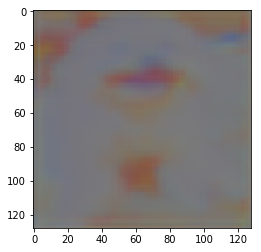

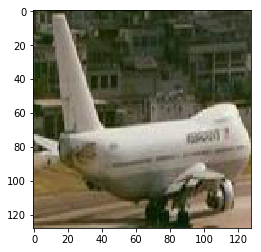

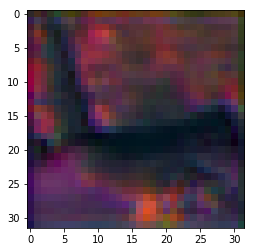

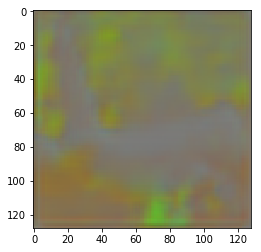

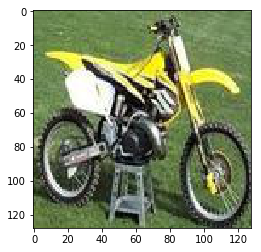

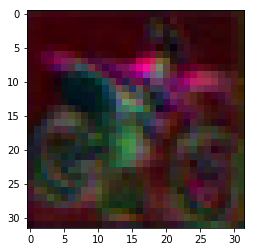

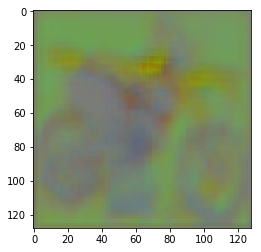

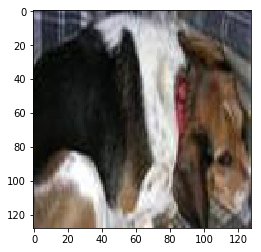

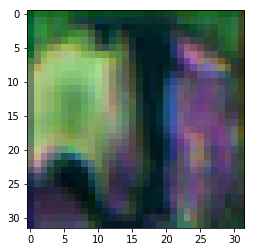

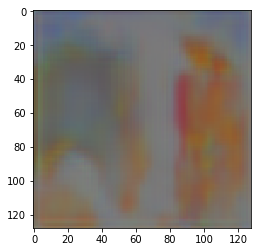

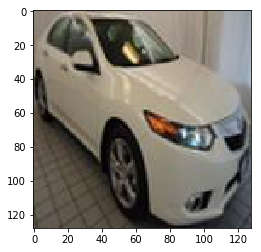

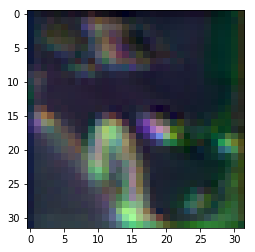

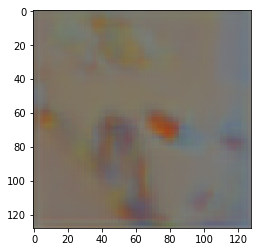

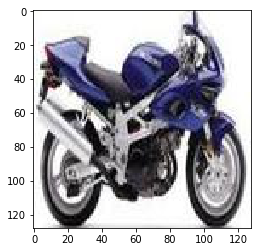

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


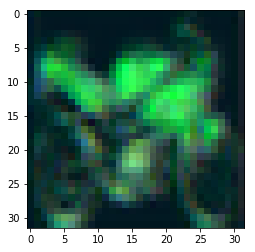

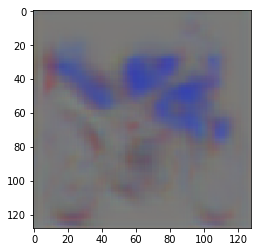

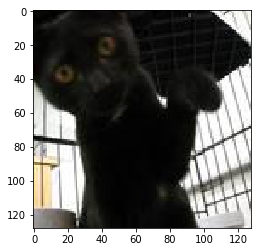

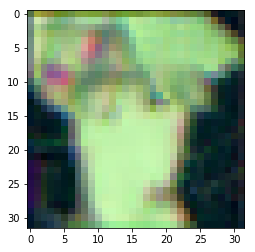

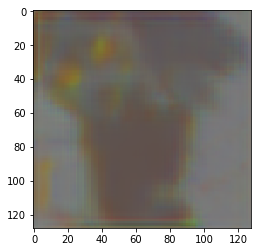

In [11]:
for i in range(30):
    #Original
    f = X_train_original[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
    #encoded
    f = X_train_encoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
    #autoencoded
    f = X_train_autoencoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()